<a href="https://colab.research.google.com/github/naveenkumarch/CE888Lab/blob/main/Lab_3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/ce888/master/lab3/bank-additional-full.csv", delimiter=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [46]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [47]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [48]:
df.y.unique()

array(['no', 'yes'], dtype=object)

no     36548
yes     4640
Name: y, dtype: int64


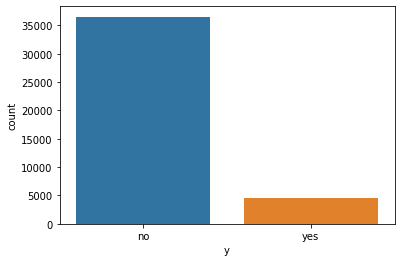

In [49]:
print(df.y.value_counts())
sns.countplot(x = df.y)

In [50]:
label =df["y"]

In [51]:
df.drop("y", inplace = True, axis = 1)

In [52]:
df.drop("duration",inplace = True,axis =1)

In [53]:
df = pd.get_dummies(df)

In [54]:
features = []
count = 0
for col in df.columns: 
    features.append(str(col))
    count +=1
print(features)
print(count)

['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'marital_unknown', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'education_unknown', 'default_no', 'default_unknown', 'default_yes', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed

In [55]:
corr_matrix = df.corr()
mask = np.zeros_like(corr_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

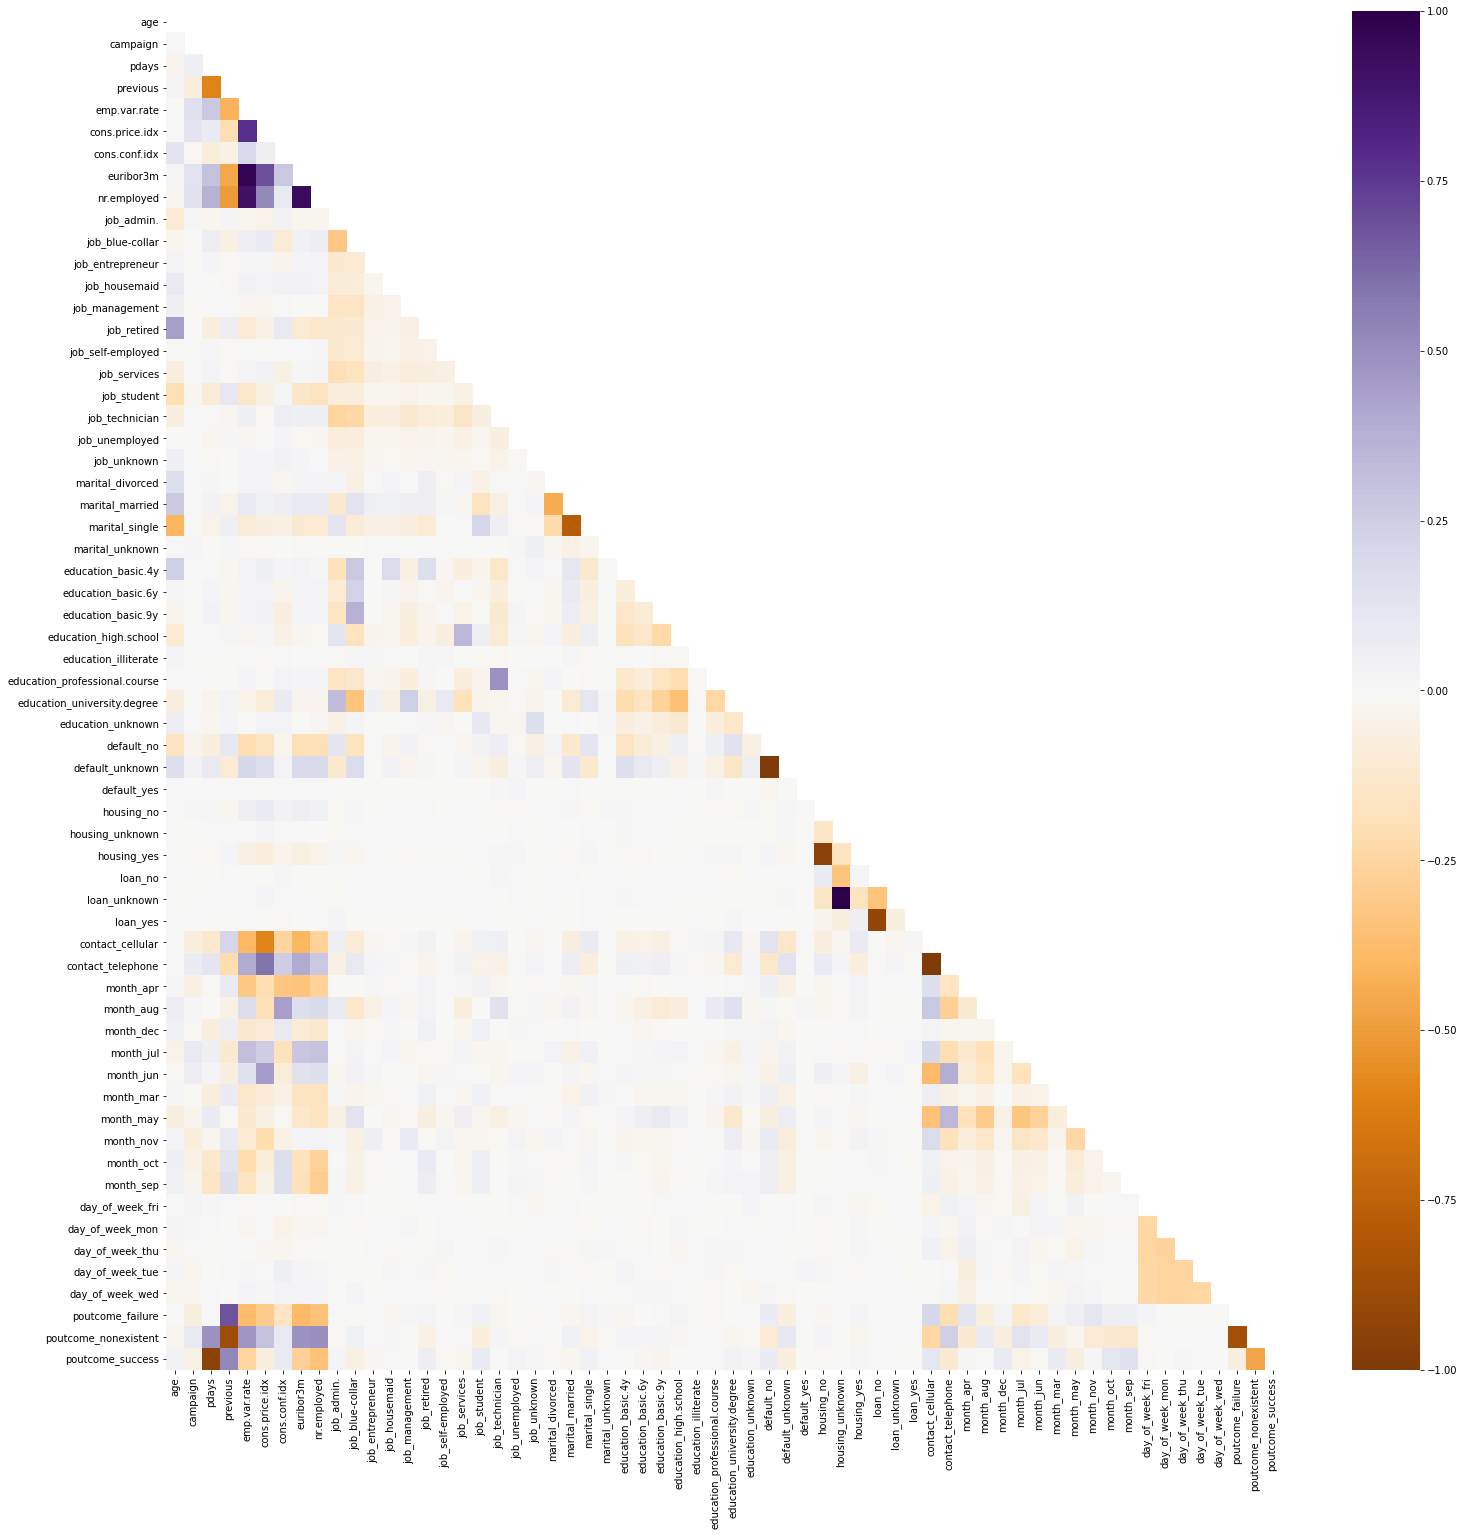

In [56]:
# Plotting the correlation matrix 
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(corr_matrix, mask =mask,cmap='PuOr',annot = False)

In [17]:
for i in range(len(label)):
  if label[i] == "yes":
    label[i] = "label1"
  else:
    label[i] = "label2"

In [57]:
label.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [58]:
label = LabelEncoder().fit_transform(label)

In [59]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit , StratifiedKFold

In [60]:
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.20, random_state=50,shuffle  =True, stratify = label)

In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn import metrics

In [62]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train, y_train)
print("Dummy ACC: %.2f" % acc(y_test, dummy_clf.predict(X_test)))
print("Classification Report:" , classification_report(y_test, dummy_clf.predict(X_test)))

Dummy ACC: 0.80
Classification Report:               precision    recall  f1-score   support

           0       0.89      0.89      0.89      7310
           1       0.11      0.11      0.11       928

    accuracy                           0.80      8238
   macro avg       0.50      0.50      0.50      8238
weighted avg       0.80      0.80      0.80      8238



In [63]:
clf = RandomForestClassifier(max_depth=6, n_estimators=400) # Default number of trees is 100 
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring=make_scorer(f1_score))
print("F1 Score : %.2f +/- %.2f" % (scores.mean(), scores.std()))

F1 Score : 0.28 +/- 0.05


In [30]:
clf = RandomForestClassifier(max_depth=8, n_estimators=200) # Default number of trees is 100 
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring=make_scorer(f1_score))
print("ACC: %.2f +/- %.2f" % (scores.mean(), scores.std()))

ACC: 0.95 +/- 0.00


In [66]:
clf = RandomForestClassifier(max_depth=8, n_estimators=100,random_state=60) # Default number of trees is 100 
#scores = cross_val_score(clf, X_train, y_train, cv=10, scoring=make_scorer(f1_score))
#print("F1 score: %.2f +/- %.2f" % (scores.mean(), scores.std()))

In [67]:
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print("F1 score on Test Data",f1_score(y_test, y_predict))

F1 score on Test Data 0.3360522022838499


In [68]:
RF_clf = RandomForestClassifier(n_estimators = 750, max_depth = 6,random_state=60)

In [69]:
RF_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=750,
                       n_jobs=None, oob_score=False, random_state=60, verbose=0,
                       warm_start=False)

Feature ranking:
1. nr.employed (0.187520)
2. euribor3m (0.146777)
3. pdays (0.114164)
4. poutcome_success (0.099274)
5. emp.var.rate (0.085325)
6. cons.conf.idx (0.075486)
7. cons.price.idx (0.059134)
8. previous (0.027865)
9. age (0.025772)
10. poutcome_nonexistent (0.019180)
11. month_mar (0.017644)
12. poutcome_failure (0.015765)
13. month_oct (0.015425)
14. month_may (0.013593)
15. contact_cellular (0.012608)
16. contact_telephone (0.011195)
17. month_apr (0.007116)
18. month_sep (0.005444)
19. month_jun (0.004910)
20. campaign (0.004351)
21. default_no (0.003925)
22. day_of_week_mon (0.003591)
23. default_unknown (0.003377)
24. job_student (0.003221)
25. job_blue-collar (0.002988)
26. job_retired (0.002521)
27. education_university.degree (0.001995)
28. month_aug (0.001604)
29. day_of_week_thu (0.001560)
30. marital_single (0.001560)
31. month_dec (0.001473)
32. day_of_week_tue (0.001369)
33. month_nov (0.001293)
34. month_jul (0.001291)
35. day_of_week_wed (0.001256)
36. educati

(0.0, 0.40656001554699706)

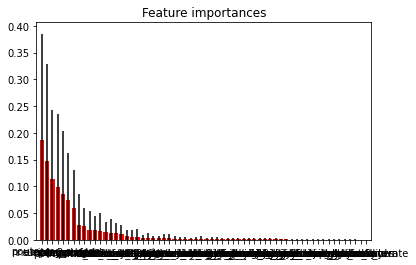

In [70]:
importances = RF_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")

for f in range(df.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
plt.bar(range(df.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(df.shape[1]), np.array(features)[indices])
plt.xlim([-1, df.shape[1]])
plt.ylim([0, None])

In [ ]:
RF = RandomForestClassifier()

In [ ]:
cv = StratifiedKFold(n_splits=10,shuffle =True)

In [ ]:
RF_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_predict = RF_clf.predict(X_test)

In [ ]:
print("Dummy ACC: %.2f" % acc(y_test, RF_clf.predict(X_test)))

Dummy ACC: 0.90


In [ ]:
# Calculating and printing matrix and Classification report 
RF_conf_mat = confusion_matrix(y_test, y_predict)
print("Confusion Matrix")
print(RF_conf_mat)
print('\n')
print("Classification Report")
print(classification_report(y_test, y_predict))

Confusion Matrix
[[ 139  789]
 [  60 7250]]


Classification Report
              precision    recall  f1-score   support

           0       0.70      0.15      0.25       928
           1       0.90      0.99      0.94      7310

    accuracy                           0.90      8238
   macro avg       0.80      0.57      0.60      8238
weighted avg       0.88      0.90      0.87      8238



In [ ]:
RF_grid = GridSearchCV(RF, param_grid,cv = cv, verbose = 50, n_jobs=-1)

In [ ]:
RF_grid.fit(X_train,y_train)

Streaming output truncated to the last 5000 lines.
[Parallel(n_jobs=-1)]: Done 3999 tasks      | elapsed: 70.1min
[Parallel(n_jobs=-1)]: Done 4000 tasks      | elapsed: 70.1min
[Parallel(n_jobs=-1)]: Done 4001 tasks      | elapsed: 70.1min
[Parallel(n_jobs=-1)]: Done 4002 tasks      | elapsed: 70.2min
[Parallel(n_jobs=-1)]: Done 4003 tasks      | elapsed: 70.2min
[Parallel(n_jobs=-1)]: Done 4004 tasks      | elapsed: 70.2min
[Parallel(n_jobs=-1)]: Done 4005 tasks      | elapsed: 70.2min
[Parallel(n_jobs=-1)]: Done 4006 tasks      | elapsed: 70.2min
[Parallel(n_jobs=-1)]: Done 4007 tasks      | elapsed: 70.3min
[Parallel(n_jobs=-1)]: Done 4008 tasks      | elapsed: 70.3min
[Parallel(n_jobs=-1)]: Done 4009 tasks      | elapsed: 70.3min
[Parallel(n_jobs=-1)]: Done 4010 tasks      | elapsed: 70.3min
[Parallel(n_jobs=-1)]: Done 4011 tasks      | elapsed: 70.4min
[Parallel(n_jobs=-1)]: Done 4012 tasks      | elapsed: 70.4min
[Parallel(n_jobs=-1)]: Done 4013 tasks      | elapsed: 70.4min
[Par

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,...
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_s

In [ ]:
print('\nBest Train Accuracy : %.2f'%RF_grid.best_score_, ' Best Params : ', str(RF_grid.best_params_))


Best Train Accuracy : 0.90  Best Params :  {'criterion': 'entropy', 'max_depth': 12, 'min_samples_split': 14, 'n_estimators': 90}


In [ ]:
# Making predictions on Test data 
y_tree_pred = RF_grid.best_estimator_.predict(X_test)

In [ ]:
print(" Validation Accuracy:",accuracy_score(y_test, y_tree_pred))
Validation_score = {'Decision_tree':accuracy_score(y_test, y_tree_pred)}

 Validation Accuracy: 0.8986404467103666


In [ ]:
tree_conf_mat = confusion_matrix(y_test, y_tree_pred)
print("Confusion Matrix")
print(tree_conf_mat)
print('\n')
print("Classification Report")
print(classification_report(y_test, y_tree_pred))

Confusion Matrix
[[ 211  717]
 [ 118 7192]]


Classification Report
              precision    recall  f1-score   support

           0       0.64      0.23      0.34       928
           1       0.91      0.98      0.95      7310

    accuracy                           0.90      8238
   macro avg       0.78      0.61      0.64      8238
weighted avg       0.88      0.90      0.88      8238



In [ ]:
RF1 = RandomForestClassifier(n_estimators = 250, max_depth = 6, random_state=60)

In [ ]:
f1_scores = cross_val_score(RF1,X_train,y_train, cv = StratifiedKFold(n_splits=10,shuffle =True),scoring = ('f1'))

In [ ]:
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [ ]:
f1_scores.mean()

0.9462645700457522